In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/niteshreddy/Downloads/USA /BootCamp/Stat Modeling/NSSO68.csv')

# Display first few rows
print(df.head())



/var/folders/6v/b_sxw5l92674vk1z5zt2z59w0000gn/T/ipykernel_8930/2418827574.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/niteshreddy/Downloads/USA /BootCamp/Stat Modeling/NSSO68.csv')


   slno                                 grp  Round_Centre  FSU_number  Round  \
0     1  40999999999999992652495293775872.0             1       41000     68   
1     2  40999999999999992652495293775872.0             1       41000     68   
2     3  40999999999999992652495293775872.0             1       41000     68   
3     4  40999999999999992652495293775872.0             1       41000     68   
4     5  40999999999999992652495293775872.0             1       41000     68   

   Schedule_Number  Sample  Sector  state  State_Region  ...  pickle_v  \
0               10       1       2     24           242  ...       0.0   
1               10       1       2     24           242  ...       0.0   
2               10       1       2     24           242  ...       0.0   
3               10       1       2     24           242  ...       0.0   
4               10       1       2     24           242  ...       0.0   

   sauce_jam_v  Othrprocessed_v  Beveragestotal_v  foodtotal_v  foodtotal_

In [7]:
# Subset data for AP state (if needed)
df_ap = df[df['state_1'] == 'AP']

# Define variables for Tobit model
vars = ["Sector", "hhdsz", "Religion", "Social_Group", "MPCE_URP", "Sex", "Age", "Marital_Status", "Education", "chicken_q", "chicken_v"]

# Subset data
df_ap_p = df_ap[vars]

# Calculate price
df_ap_p['price'] = df_ap_p['chicken_v'] / df_ap_p['chicken_q']


/var/folders/6v/b_sxw5l92674vk1z5zt2z59w0000gn/T/ipykernel_8930/259676485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_p['price'] = df_ap_p['chicken_v'] / df_ap_p['chicken_q']


In [15]:
# Fitting a Multiple Linear Regression Model
X = df_ap_p[['hhdsz', 'Religion', 'MPCE_URP', 'Sex', 'Age', 'Marital_Status', 'Education', 'price']]
y = df_ap_p['chicken_q']

# Replace infinite or NaN values in X with appropriate values (e.g., median)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# Add constant to X
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              chicken_q   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     66.78
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          4.77e-106
Time:                        17:04:06   Log-Likelihood:                -2425.6
No. Observations:                6899   AIC:                             4869.
Df Residuals:                    6890   BIC:                             4931.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5080      0.044     11.

/var/folders/6v/b_sxw5l92674vk1z5zt2z59w0000gn/T/ipykernel_8930/3790838882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/6v/b_sxw5l92674vk1z5zt2z59w0000gn/T/ipykernel_8930/3790838882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming df_ap_p['price'] has already been filled with 0 for NaN values
df_ap_p['price'].fillna(0, inplace=True)

# Define the dependent variable (y) and the predictors (X)
y = df_ap_p['chicken_q']
X = df_ap_p[['hhdsz', 'Religion', 'MPCE_URP', 'Sex', 'Age', 'Marital_Status', 'Education', 'price']]

# Add constant to X
X = sm.add_constant(X)

# Fit Tobit model
tobit_model = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 for robust standard errors
print(tobit_model.summary())



                            OLS Regression Results                            
Dep. Variable:              chicken_q   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     676.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:06:28   Log-Likelihood:                -1510.1
No. Observations:                6899   AIC:                             3038.
Df Residuals:                    6890   BIC:                             3100.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0284      0.028      1.

/var/folders/6v/b_sxw5l92674vk1z5zt2z59w0000gn/T/ipykernel_8930/623019213.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_p['price'].fillna(0, inplace=True)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


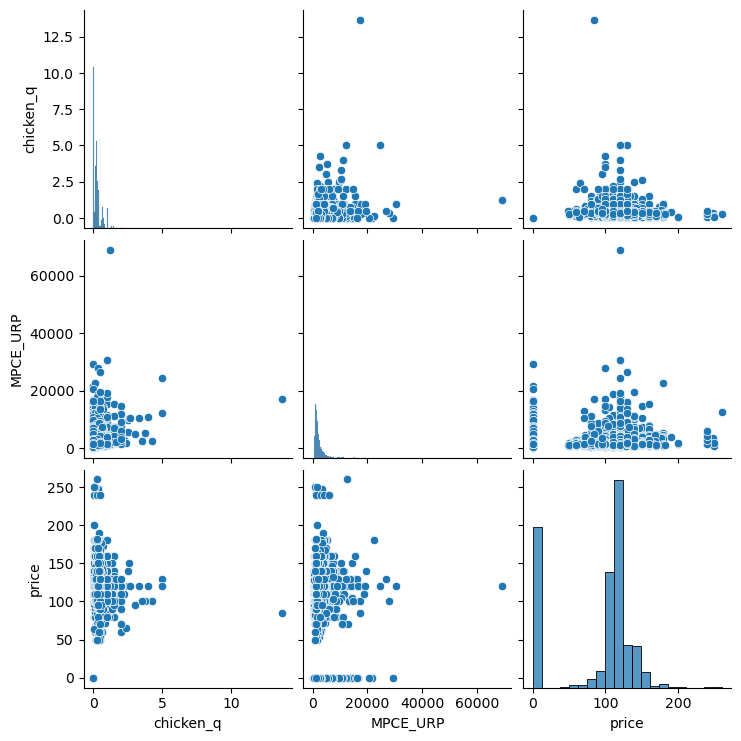

In [23]:
# Visualize with pairplot (similar to GGally in R)
sns.pairplot(df_ap_p[['chicken_q', 'MPCE_URP', 'price']])
plt.show()
